# Importing packages and data

In [79]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from kaggle.api.kaggle_api_extended import KaggleApi
plt.style.use('ggplot')
from scipy.stats import ttest_ind, levene, probplot, shapiro, mannwhitneyu, chi2_contingency, f_oneway
import statsmodels.api as sm

In [2]:
# Connection to Kaggle
api = KaggleApi()
api.authenticate()

In [5]:
# Define dataset and destination
dataset_url = 'oktayrdeki/heart-disease'
download_path = 'datasets/heart-disease'  # Specify destination folder

# Download dataset
api.dataset_download_files(dataset_url, path=download_path, unzip=True)

print(f"Dataset downloaded to: {os.path.abspath(download_path)}")

Dataset URL: https://www.kaggle.com/datasets/oktayrdeki/heart-disease
Dataset downloaded to: C:\Users\karen\Documents\Data-science_course_INT\Python_files\datasets\heart-disease


In [124]:
dataset_file = 'datasets/heart-disease/heart_disease.csv'
df = pd.read_csv(dataset_file)
pd.set_option('display.max_columns', None)  # Show all columns

# Data description

In [3]:
df.columns

Index(['Age', 'Gender', 'Blood Pressure', 'Cholesterol Level',
       'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'BMI',
       'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol',
       'Alcohol Consumption', 'Stress Level', 'Sleep Hours',
       'Sugar Consumption', 'Triglyceride Level', 'Fasting Blood Sugar',
       'CRP Level', 'Homocysteine Level', 'Heart Disease Status'],
      dtype='object')

In [4]:
df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [6]:
df.isna().sum()

Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64

<Axes: >

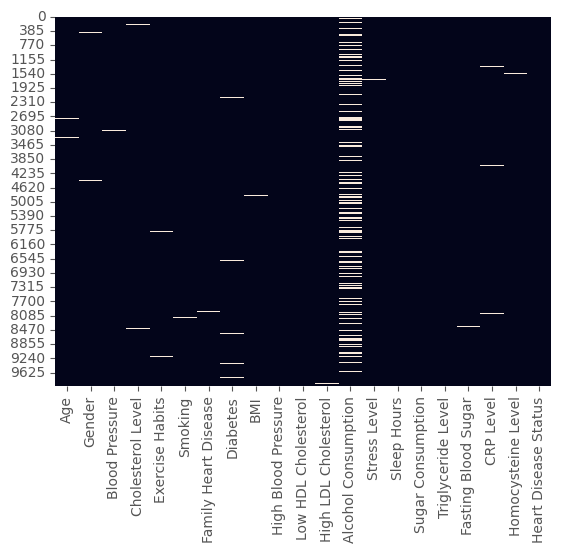

In [7]:
# Visualize missing data
sns.heatmap(df.isnull(), cbar=False)

In [141]:
missing_count = df.isnull().sum()
missing_percentage = (missing_count / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing_count, 'Missing Percentage': missing_percentage})
print(missing_df.sort_values(by='Missing Percentage', ascending=False))

                      Missing Count  Missing Percentage
Blood Pressure Group            167                1.67
Diabetes                         30                0.30
Cholesterol Level                30                0.30
Sugar Consumption                30                0.30
Age                              29                0.29
High LDL Cholesterol             26                0.26
CRP Level                        26                0.26
Triglyceride Level               26                0.26
CRP Group                        26                0.26
High Blood Pressure              26                0.26
Sleep Hours Group                25                0.25
Exercise Habits                  25                0.25
Sleep Hours                      25                0.25
Low HDL Cholesterol              25                0.25
Smoking                          25                0.25
Stress Level                     22                0.22
Fasting Blood Sugar              22             

## Handling missing data

In [125]:
# Delete 'Alcohol Consumption' since so many values are missing
df.drop(columns=['Alcohol Consumption'], inplace=True)

In [126]:
# Round up Sleep Hours
df['Sleep Hours'] = df['Sleep Hours'].round(2)

df.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,Medium,7.63,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,Yes,No,High,8.74,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,Yes,Yes,Low,4.44,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,No,Yes,High,5.25,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,No,No,High,7.03,High,263.0,154.0,10.381259,8.153887,No


In [13]:
# Missing data in Age column
for col in df.columns:
    print(f'Missing data in {col} column:')
    display(df[df[col].isnull()])

Missing data in Age:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
716,NaN,Male,160.0,184.0,Low,No,Yes,Yes,27.047567,Yes,No,Yes,Low,9.934741,High,350.0,150.0,11.272342,14.699716,No
1017,NaN,Male,173.0,251.0,Medium,No,No,No,22.763765,Yes,Yes,No,Medium,9.993930,Medium,280.0,159.0,14.503787,7.710791,No
1039,NaN,Female,154.0,274.0,High,No,Yes,No,35.849791,No,No,Yes,High,9.664409,Low,381.0,95.0,14.439670,14.609873,No
1468,NaN,Male,141.0,154.0,Medium,Yes,Yes,No,31.140165,No,No,Yes,Low,6.201681,Low,329.0,137.0,12.462463,12.089437,No
1703,NaN,Male,147.0,258.0,High,Yes,Yes,No,35.350381,Yes,Yes,No,High,8.594565,Low,323.0,96.0,11.595321,18.067759,No
1867,NaN,Male,142.0,225.0,High,Yes,No,Yes,23.275787,Yes,Yes,Yes,Medium,6.317396,Low,329.0,85.0,7.686572,11.632494,No
2751,NaN,Male,142.0,167.0,Medium,Yes,Yes,Yes,39.995797,Yes,Yes,No,High,6.992129,Low,290.0,98.0,6.087670,17.357159,No
2869,NaN,Female,149.0,216.0,Low,Yes,No,No,22.739004,No,No,No,Low,8.105417,High,158.0,108.0,6.105748,18.420638,No
3195,NaN,Male,151.0,284.0,Medium,Yes,Yes,Yes,29.943396,No,No,No,Medium,9.378915,High,324.0,88.0,7.633548,13.992860,No
3265,NaN,Female,163.0,273.0,Medium,Yes,Yes,No,28.587588,Yes,Yes,Yes,High,6.849657,Low,291.0,98.0,14.261332,6.605307,No


Missing data in Gender:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
424,50.0,NaN,147.0,264.0,Low,Yes,No,No,20.738247,No,Yes,Yes,High,8.336586,Medium,250.0,118.0,8.867577,16.841735,No
1550,43.0,NaN,152.0,187.0,Low,No,Yes,No,33.284306,Yes,No,Yes,Medium,7.296031,Medium,301.0,156.0,9.886391,12.976745,No
1770,24.0,NaN,150.0,289.0,Medium,No,No,Yes,37.468353,Yes,No,Yes,Medium,9.437677,Low,286.0,87.0,2.558269,8.752621,No
1956,54.0,NaN,176.0,171.0,Low,Yes,Yes,No,34.130846,No,No,Yes,Medium,6.503275,High,140.0,141.0,3.246492,14.371188,No
2056,62.0,NaN,134.0,195.0,Medium,Yes,Yes,No,20.288229,No,Yes,Yes,Medium,5.793387,Medium,130.0,135.0,4.169477,13.851085,No
2403,20.0,NaN,135.0,155.0,High,No,No,Yes,38.974130,Yes,Yes,No,Medium,5.177439,High,328.0,100.0,7.147045,16.562374,No
2917,18.0,NaN,170.0,204.0,High,Yes,Yes,No,33.050938,Yes,Yes,Yes,Low,6.110008,High,264.0,156.0,10.342341,5.599611,No
3221,37.0,NaN,135.0,207.0,Medium,Yes,Yes,No,39.741540,No,No,No,Low,9.508101,Medium,132.0,133.0,11.894277,8.996898,No
3249,33.0,NaN,142.0,240.0,Low,Yes,Yes,Yes,38.093540,Yes,Yes,Yes,High,4.462218,Medium,296.0,101.0,2.561409,6.623389,No
3837,47.0,NaN,157.0,216.0,Medium,Yes,Yes,Yes,27.911349,Yes,No,No,Medium,9.121349,High,175.0,84.0,13.921607,8.362707,No


Missing data in Blood Pressure:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
86,67.0,Female,NaN,243.0,Medium,No,No,Yes,36.929749,Yes,No,Yes,Medium,7.104835,Medium,383.0,100.0,11.984273,10.168021,No
223,62.0,Female,NaN,231.0,Medium,Yes,Yes,No,28.961550,Yes,Yes,Yes,High,9.771211,High,150.0,97.0,5.222643,12.288388,No
302,61.0,Female,NaN,279.0,Low,Yes,Yes,No,21.746595,Yes,Yes,Yes,Low,5.393680,Medium,190.0,143.0,7.542982,6.426180,No
309,72.0,Female,NaN,151.0,Low,No,Yes,Yes,26.835496,Yes,No,Yes,Medium,6.554749,Medium,367.0,94.0,13.357922,19.620655,No
608,72.0,Male,NaN,280.0,Medium,No,No,No,39.818485,No,No,Yes,Low,7.006837,Low,290.0,112.0,0.648018,14.781755,No
1410,61.0,Female,NaN,224.0,High,No,Yes,Yes,35.976633,Yes,No,Yes,High,8.705024,Medium,235.0,138.0,7.428157,11.089096,No
3076,33.0,Female,NaN,162.0,High,Yes,No,No,38.157967,Yes,No,No,Medium,4.531113,Medium,115.0,139.0,12.081217,17.174314,No
3175,55.0,Male,NaN,161.0,Medium,Yes,No,Yes,29.301913,No,Yes,Yes,High,8.041602,Low,162.0,124.0,11.709375,9.847357,No
3194,40.0,Female,NaN,262.0,Medium,Yes,No,Yes,23.654700,No,No,No,Low,5.475813,Medium,200.0,116.0,13.054987,12.184590,No
4481,44.0,Female,NaN,289.0,Medium,No,Yes,No,34.846461,No,No,Yes,Low,5.490190,Low,373.0,83.0,11.585405,11.366388,No


Missing data in Cholesterol Level:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
208,56.0,Female,166.0,NaN,High,Yes,Yes,Yes,23.254133,Yes,No,No,Medium,7.516553,High,202.0,148.0,12.853385,16.077128,No
259,50.0,Female,126.0,NaN,Low,Yes,Yes,No,34.979777,Yes,No,Yes,Medium,4.262158,Medium,277.0,124.0,7.385178,9.246145,No
261,59.0,Male,149.0,NaN,High,Yes,No,No,18.121321,No,Yes,Yes,Medium,5.171790,High,196.0,131.0,9.245852,19.204219,No
287,76.0,Male,178.0,NaN,Low,No,No,No,22.629882,Yes,No,No,High,9.037390,Low,118.0,138.0,12.935996,11.908112,No
900,45.0,Female,140.0,NaN,Medium,No,No,Yes,38.435808,No,Yes,Yes,Medium,6.061973,Medium,360.0,156.0,7.218437,14.568162,No
983,34.0,Male,125.0,NaN,High,Yes,No,No,30.554983,No,No,Yes,High,9.857814,High,174.0,110.0,7.219496,8.584973,No
2039,57.0,Male,160.0,NaN,Medium,No,No,Yes,18.304871,Yes,Yes,No,High,6.895230,Low,145.0,160.0,12.727649,16.095144,No
2364,78.0,Female,136.0,NaN,Low,No,Yes,No,24.731179,No,Yes,Yes,Medium,9.522828,Low,216.0,84.0,11.366603,19.570980,No
2433,29.0,Male,179.0,NaN,High,No,Yes,Yes,23.520459,No,No,No,High,8.652666,Medium,202.0,111.0,1.805525,17.352958,No
2953,38.0,Female,137.0,NaN,Low,Yes,No,Yes,21.806701,Yes,Yes,Yes,High,6.489208,Medium,218.0,118.0,7.084201,18.311254,No


Missing data in Exercise Habits:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
670,79.0,Female,157.0,282.0,NaN,Yes,No,Yes,28.551388,Yes,No,Yes,Medium,9.459201,Low,214.0,155.0,9.419200,16.836346,No
819,38.0,Male,160.0,195.0,NaN,Yes,Yes,Yes,31.945086,Yes,Yes,Yes,Medium,6.807334,Medium,212.0,82.0,8.552898,8.298700,No
880,48.0,Female,140.0,287.0,NaN,No,No,No,29.507261,No,No,Yes,High,7.936810,Low,384.0,91.0,0.371965,14.186315,No
898,75.0,Female,177.0,151.0,NaN,No,Yes,Yes,21.430834,Yes,No,Yes,High,4.537226,Medium,383.0,129.0,3.987269,17.435950,No
1079,20.0,Male,120.0,235.0,NaN,Yes,No,No,26.181903,Yes,Yes,No,High,7.708347,Medium,289.0,158.0,13.387217,13.612229,No
1673,47.0,Female,144.0,233.0,NaN,Yes,No,Yes,36.530039,No,No,No,High,8.126276,High,216.0,128.0,2.858838,19.918736,No
1893,46.0,Female,151.0,245.0,NaN,Yes,No,No,19.310400,Yes,Yes,No,Medium,8.872712,High,392.0,103.0,7.519308,6.284544,No
1910,39.0,Female,132.0,285.0,NaN,No,Yes,No,35.139103,No,No,Yes,Medium,5.017914,High,312.0,97.0,2.293147,12.079178,No
2306,30.0,Male,169.0,252.0,NaN,No,Yes,No,19.494114,No,Yes,No,Low,5.753860,High,225.0,103.0,0.476799,17.616309,No
2583,33.0,Male,137.0,199.0,NaN,Yes,No,Yes,31.253976,No,No,Yes,High,6.487751,High,366.0,138.0,0.020030,18.909867,No


Missing data in Smoking:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
281,20.0,Male,141.0,225.0,High,NaN,Yes,No,38.378099,Yes,No,Yes,Low,5.583504,Low,396.0,119.0,8.292800,7.618141,No
458,50.0,Female,143.0,220.0,Low,NaN,Yes,No,19.659608,No,No,No,Medium,7.202544,Medium,398.0,85.0,12.516318,13.677140,No
560,80.0,Female,155.0,254.0,High,NaN,No,No,34.513431,No,No,No,Medium,7.887634,High,328.0,126.0,12.165141,12.435134,No
593,57.0,Male,167.0,258.0,Medium,NaN,No,Yes,38.042318,Yes,Yes,Yes,Medium,6.585106,Low,206.0,88.0,1.747252,11.661336,No
1153,74.0,Female,126.0,224.0,High,NaN,No,No,27.830421,Yes,Yes,No,Medium,9.629133,Medium,160.0,118.0,5.395568,9.303565,No
2195,26.0,Female,142.0,220.0,High,NaN,Yes,Yes,36.511539,Yes,No,No,Low,4.467277,High,187.0,111.0,7.722745,5.635999,No
2833,59.0,Male,150.0,178.0,Low,NaN,No,Yes,37.702723,Yes,Yes,No,High,6.356776,Medium,376.0,104.0,10.660086,10.432957,No
2919,79.0,Female,150.0,244.0,Low,NaN,Yes,Yes,37.462915,Yes,Yes,No,High,7.442483,High,211.0,135.0,5.715697,7.264340,No
3409,34.0,Male,143.0,177.0,Low,NaN,Yes,Yes,33.296120,Yes,No,No,Medium,5.524679,Low,271.0,84.0,3.185498,10.504650,No
3998,40.0,Female,132.0,268.0,High,NaN,No,No,23.989152,Yes,No,Yes,High,8.327680,Low,293.0,91.0,1.368376,7.590033,No


Missing data in Family Heart Disease:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
44,33.0,Male,171.0,287.0,Medium,No,NaN,No,21.736041,Yes,No,Yes,High,5.728514,High,329.0,82.0,6.892172,14.980571,No
632,70.0,Female,137.0,257.0,High,Yes,NaN,No,26.352495,Yes,Yes,Yes,Low,5.265072,Medium,349.0,81.0,4.032282,6.834373,No
963,41.0,Male,152.0,262.0,Medium,Yes,NaN,Yes,20.600808,No,No,No,Medium,8.386547,Low,136.0,128.0,13.690997,9.132800,No
1731,20.0,Male,177.0,295.0,Medium,No,NaN,No,36.114431,No,No,Yes,Low,8.289710,Medium,249.0,150.0,0.449952,14.448030,No
1815,63.0,Male,125.0,230.0,Low,Yes,NaN,Yes,31.916481,Yes,No,No,Low,9.613955,Medium,371.0,128.0,8.070008,17.901470,No
3004,78.0,Female,121.0,279.0,High,No,NaN,Yes,20.934607,Yes,No,Yes,Low,9.941460,High,101.0,153.0,8.759871,19.093941,No
3111,52.0,Male,175.0,233.0,Low,Yes,NaN,Yes,32.467061,Yes,No,No,High,4.840382,High,368.0,124.0,6.452310,7.122629,No
3288,29.0,Male,147.0,200.0,Low,Yes,NaN,No,32.201411,Yes,Yes,No,Low,8.385262,Medium,374.0,135.0,10.305946,18.489427,No
3822,36.0,Female,169.0,247.0,Low,No,NaN,Yes,19.132556,No,No,No,Low,8.046969,Medium,140.0,88.0,11.766758,12.249646,No
4195,72.0,Male,134.0,191.0,Medium,Yes,NaN,Yes,18.652104,No,Yes,No,High,4.285968,High,287.0,148.0,4.044127,8.307039,No


Missing data in Diabetes:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
263,41.0,Male,142.0,178.0,Medium,No,Yes,NaN,38.765596,No,Yes,Yes,Medium,7.978284,High,177.0,100.0,3.210010,13.212216,No
497,42.0,Male,144.0,168.0,Medium,Yes,Yes,NaN,21.915472,No,No,No,Low,4.014273,High,191.0,145.0,11.036609,16.985031,No
743,24.0,Female,128.0,252.0,Medium,No,Yes,NaN,18.611233,No,Yes,Yes,Low,9.941954,Medium,371.0,140.0,10.748059,19.570800,No
747,67.0,Male,173.0,270.0,High,Yes,No,NaN,18.651778,Yes,Yes,Yes,Low,5.281200,High,269.0,143.0,13.185503,12.216496,No
987,37.0,Female,154.0,295.0,Medium,Yes,Yes,NaN,28.964596,Yes,Yes,Yes,Medium,6.362222,High,254.0,111.0,4.295243,6.193044,No
1037,72.0,Female,137.0,191.0,High,Yes,Yes,NaN,27.216022,Yes,Yes,Yes,Medium,5.551056,High,392.0,129.0,6.769825,12.848297,No
1149,65.0,Male,139.0,186.0,Medium,Yes,No,NaN,22.883012,Yes,No,No,Medium,6.790210,High,123.0,125.0,1.574724,17.027064,No
1884,77.0,Female,169.0,238.0,Low,Yes,Yes,NaN,27.476710,No,Yes,Yes,High,8.550962,Medium,299.0,123.0,11.086933,12.499151,No
2183,79.0,Male,145.0,166.0,Low,No,Yes,NaN,35.489130,Yes,Yes,No,Medium,6.823537,Medium,139.0,96.0,5.239871,14.857855,No
2380,63.0,Female,136.0,216.0,Medium,Yes,No,NaN,39.657957,No,Yes,Yes,High,8.369746,Low,102.0,137.0,0.102138,12.048279,No


Missing data in BMI:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
125,77.0,Female,132.0,197.0,Medium,No,No,No,NaN,No,Yes,Yes,Medium,7.589657,Low,139.0,109.0,9.760314,11.520542,No
185,80.0,Male,172.0,157.0,Medium,Yes,Yes,No,NaN,Yes,Yes,Yes,Medium,4.472033,Low,160.0,128.0,11.473799,10.008620,No
364,24.0,Female,156.0,192.0,Medium,Yes,No,Yes,NaN,No,Yes,No,Low,9.562475,Low,250.0,130.0,1.109646,16.333250,No
680,69.0,Male,155.0,175.0,Medium,No,Yes,No,NaN,Yes,Yes,Yes,Low,6.510648,Low,205.0,95.0,5.867761,9.457168,No
755,78.0,Female,126.0,243.0,Medium,Yes,No,No,NaN,Yes,Yes,No,Medium,9.582817,High,189.0,155.0,11.872390,6.781323,No
1285,57.0,Male,140.0,196.0,Medium,Yes,No,Yes,NaN,Yes,Yes,No,Medium,8.684302,Low,138.0,146.0,6.534462,11.375321,No
1603,72.0,Male,137.0,231.0,High,Yes,No,Yes,NaN,Yes,Yes,No,Medium,7.129212,High,282.0,149.0,0.221862,6.944440,No
1658,37.0,Male,168.0,219.0,High,No,Yes,No,NaN,Yes,Yes,Yes,Low,8.237565,Medium,145.0,103.0,12.759023,11.901224,No
2996,32.0,Female,178.0,288.0,Medium,Yes,Yes,No,NaN,Yes,No,Yes,High,5.481969,High,348.0,145.0,0.997259,19.514066,No
3597,75.0,Male,178.0,278.0,Medium,Yes,Yes,No,NaN,No,Yes,Yes,Low,4.968808,Low,262.0,129.0,6.807166,16.160626,No


Missing data in High Blood Pressure:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
25,47.0,Male,135.0,206.0,Low,No,No,No,37.351337,NaN,Yes,No,High,9.700067,Low,257.0,122.0,12.121839,12.678489,No
783,58.0,Female,162.0,276.0,Medium,Yes,No,No,27.778637,NaN,No,No,Medium,4.379693,High,200.0,140.0,2.557651,15.509499,No
825,56.0,Female,140.0,163.0,High,No,No,No,18.365312,NaN,Yes,No,Medium,4.968982,Low,165.0,90.0,5.584811,15.522909,No
853,57.0,Male,125.0,263.0,Low,Yes,Yes,Yes,38.925263,NaN,No,Yes,Low,8.948647,Low,300.0,109.0,2.170277,18.961381,No
1217,66.0,Male,169.0,214.0,High,Yes,Yes,No,33.035987,NaN,No,No,Low,6.066144,High,178.0,135.0,9.351612,12.211168,No
1814,76.0,Male,152.0,165.0,High,No,No,Yes,19.157139,NaN,No,Yes,Low,6.223578,Medium,234.0,98.0,9.059933,19.594659,No
2278,77.0,Female,167.0,290.0,Low,Yes,No,No,39.737202,NaN,Yes,Yes,Medium,6.006431,High,239.0,104.0,4.756912,11.595353,No
2540,39.0,Male,123.0,190.0,High,No,Yes,No,32.637274,NaN,No,No,Medium,8.481659,Medium,243.0,151.0,1.556569,18.680511,No
2739,28.0,Male,165.0,253.0,High,Yes,Yes,Yes,32.301861,NaN,No,No,High,6.973316,Low,360.0,125.0,14.016641,16.206963,No
3393,52.0,Female,159.0,273.0,Low,Yes,Yes,Yes,20.703359,NaN,Yes,No,High,6.941595,High,244.0,158.0,0.858854,8.625107,No


Missing data in Low HDL Cholesterol:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
8,56.0,Female,135.0,291.0,Low,No,Yes,Yes,34.493112,Yes,NaN,Yes,Low,6.941403,High,317.0,103.0,5.119015,6.051129,No
1358,21.0,Female,139.0,257.0,Medium,Yes,No,No,28.697004,Yes,NaN,Yes,Low,7.150912,Low,284.0,80.0,11.678208,5.686532,No
2292,70.0,Male,169.0,280.0,Medium,No,Yes,No,27.805916,Yes,NaN,Yes,Low,9.460794,Medium,156.0,97.0,2.674883,19.339997,No
2652,21.0,Female,171.0,164.0,High,Yes,Yes,Yes,22.622637,No,NaN,No,Low,6.945733,Low,381.0,118.0,5.416963,10.016166,No
3247,50.0,Female,141.0,227.0,High,Yes,Yes,Yes,38.059485,Yes,NaN,Yes,Low,4.588654,High,353.0,129.0,6.580284,19.580859,No
3262,58.0,Male,179.0,230.0,Medium,Yes,No,Yes,36.434277,Yes,NaN,Yes,High,8.189324,High,272.0,96.0,12.947261,19.331449,No
3662,79.0,Female,149.0,281.0,Medium,No,No,Yes,37.957035,No,NaN,No,Low,9.720685,Low,349.0,94.0,9.116457,15.928543,No
3788,63.0,Female,168.0,195.0,Medium,Yes,No,No,25.554442,No,NaN,No,Medium,7.453916,Medium,368.0,150.0,0.661862,14.421583,No
4081,57.0,Male,134.0,197.0,Low,Yes,Yes,No,30.536663,Yes,NaN,Yes,Low,5.275769,High,373.0,154.0,9.863040,11.698351,No
4084,39.0,Male,137.0,248.0,Medium,No,No,No,31.525169,Yes,NaN,Yes,Medium,9.956228,Low,232.0,99.0,3.381369,18.613423,No


Missing data in High LDL Cholesterol:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
671,47.0,Female,148.0,274.0,High,Yes,No,No,28.180963,No,Yes,NaN,Medium,4.192537,High,376.0,128.0,5.759056,8.848339,No
772,40.0,Female,138.0,265.0,High,Yes,Yes,Yes,28.636617,Yes,No,NaN,Low,6.082042,High,224.0,125.0,13.532909,14.188942,No
789,65.0,Female,177.0,291.0,Low,No,Yes,Yes,39.196709,Yes,Yes,NaN,Low,4.035959,High,183.0,138.0,9.841854,10.902043,No
1935,34.0,Female,131.0,227.0,Low,No,No,Yes,36.930553,Yes,Yes,NaN,Low,7.673905,Medium,118.0,120.0,2.030673,18.151786,No
2217,22.0,Male,124.0,264.0,High,No,Yes,No,31.190644,Yes,Yes,NaN,Low,5.445231,Medium,125.0,110.0,5.580691,16.944149,No
2648,78.0,Female,125.0,174.0,High,No,No,No,34.185092,Yes,No,NaN,High,8.662393,High,248.0,116.0,11.727868,14.658169,No
2769,66.0,Female,163.0,296.0,Medium,No,Yes,Yes,35.582743,No,Yes,NaN,Low,9.790119,Medium,211.0,121.0,2.595528,13.523248,No
3008,69.0,Male,169.0,160.0,Medium,No,Yes,No,38.203700,No,Yes,NaN,Medium,7.366682,Low,108.0,139.0,12.668106,11.630633,No
3161,58.0,Female,137.0,257.0,Medium,No,No,Yes,27.067916,No,No,NaN,Medium,5.156433,Low,393.0,106.0,2.846361,19.528796,No
3363,77.0,Male,159.0,234.0,Medium,No,No,Yes,31.261431,Yes,No,NaN,Low,5.529612,High,196.0,114.0,14.066503,12.357441,No


Missing data in Stress Level:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
110,31.0,Male,149.0,198.0,High,No,Yes,No,39.525207,Yes,No,Yes,NaN,8.481293,Low,381.0,118.0,2.177883,19.282086,No
160,29.0,Female,158.0,223.0,High,Yes,No,No,27.439651,No,No,No,NaN,4.618952,High,320.0,131.0,7.114832,11.565983,No
174,52.0,Male,141.0,286.0,Low,No,Yes,Yes,26.159731,Yes,No,No,NaN,7.237446,Low,299.0,111.0,9.578059,17.839394,No
457,64.0,Male,162.0,254.0,Medium,Yes,Yes,No,31.849115,Yes,Yes,No,NaN,5.482596,High,309.0,150.0,11.333668,14.518882,No
868,18.0,Male,157.0,231.0,Medium,Yes,Yes,No,25.926978,Yes,Yes,Yes,NaN,9.561684,Medium,345.0,109.0,1.835666,17.721244,No
1579,75.0,Male,171.0,228.0,High,No,No,Yes,39.119128,Yes,No,No,NaN,4.387004,High,388.0,147.0,7.666024,7.204922,No
1696,19.0,Male,149.0,192.0,Low,No,No,No,27.676182,No,No,No,NaN,7.410239,High,214.0,111.0,12.190575,6.561065,No
2194,42.0,Male,148.0,220.0,Low,Yes,Yes,No,38.700265,No,No,No,NaN,5.177494,High,396.0,123.0,1.586696,6.097067,No
2601,29.0,Male,136.0,251.0,Medium,Yes,Yes,Yes,28.083855,Yes,Yes,Yes,NaN,9.477814,Low,150.0,91.0,7.959218,8.685925,No
2624,39.0,Male,139.0,290.0,Medium,No,Yes,Yes,30.721965,Yes,No,Yes,NaN,9.454718,High,330.0,105.0,13.422617,9.268877,No


Missing data in Sleep Hours:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
165,40.0,Male,141.0,208.0,High,No,No,No,31.258529,Yes,No,Yes,High,NaN,Medium,288.0,145.0,0.899676,7.567154,No
711,60.0,Male,126.0,178.0,Low,Yes,Yes,No,24.487907,Yes,No,No,High,NaN,Medium,329.0,149.0,0.650081,9.739420,No
1547,25.0,Male,138.0,190.0,Medium,Yes,No,Yes,39.846120,Yes,No,Yes,High,NaN,Low,169.0,155.0,8.185999,11.525752,No
1668,66.0,Male,130.0,174.0,High,No,No,Yes,31.345407,No,No,Yes,Low,NaN,Medium,390.0,155.0,12.396119,5.145392,No
2523,50.0,Female,127.0,188.0,Medium,No,Yes,No,27.111384,No,Yes,Yes,Medium,NaN,Low,332.0,110.0,4.802561,11.820029,No
3181,78.0,Female,159.0,300.0,Low,No,No,Yes,20.589212,Yes,No,Yes,Medium,NaN,High,127.0,137.0,4.535195,8.479670,No
3511,77.0,Male,131.0,184.0,Medium,No,No,No,23.254014,No,Yes,Yes,High,NaN,Medium,285.0,153.0,1.872495,14.647448,No
3722,20.0,Female,150.0,169.0,Medium,No,Yes,No,34.479835,Yes,Yes,Yes,Medium,NaN,Low,173.0,109.0,1.583815,18.418236,No
3919,53.0,Female,152.0,202.0,Low,Yes,Yes,Yes,38.879672,No,No,Yes,Medium,NaN,Low,193.0,102.0,11.489255,15.012582,No
4135,32.0,Female,122.0,291.0,Medium,No,Yes,Yes,20.954820,No,Yes,Yes,Medium,NaN,Medium,235.0,156.0,10.001219,19.677853,No


Missing data in Sugar Consumption:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
60,26.0,Male,153.0,298.0,High,Yes,Yes,Yes,18.403523,No,No,No,Medium,6.466650,NaN,124.0,103.0,14.963064,18.552265,No
285,73.0,Female,160.0,227.0,Medium,Yes,Yes,No,35.653629,No,Yes,Yes,Medium,8.610199,NaN,224.0,119.0,11.003534,11.172461,No
921,75.0,Female,147.0,191.0,Medium,No,Yes,No,26.060644,Yes,No,No,Low,4.903758,NaN,146.0,108.0,1.399215,18.184150,No
1029,50.0,Female,162.0,201.0,Low,Yes,No,Yes,29.002965,Yes,No,No,Medium,9.583001,NaN,382.0,113.0,9.376554,5.796474,No
1377,20.0,Male,165.0,257.0,High,Yes,No,Yes,27.637461,No,Yes,No,High,4.037378,NaN,192.0,102.0,3.487691,9.507172,No
1587,39.0,Female,159.0,192.0,Medium,No,Yes,No,31.040221,No,Yes,Yes,Medium,8.755729,NaN,324.0,92.0,9.681864,13.599260,No
2532,50.0,Female,124.0,181.0,Medium,No,No,Yes,39.680906,No,No,No,High,8.764734,NaN,165.0,92.0,3.488935,7.307690,No
3878,67.0,Female,155.0,204.0,Low,No,No,Yes,21.097722,No,Yes,No,High,5.372671,NaN,233.0,89.0,12.651271,7.239415,No
4044,19.0,Male,152.0,259.0,High,No,No,Yes,37.308920,No,Yes,No,High,5.087412,NaN,285.0,92.0,2.229933,13.901733,No
4143,23.0,Male,152.0,279.0,Low,Yes,No,No,33.521414,No,Yes,No,Low,9.826824,NaN,385.0,153.0,13.292341,10.344705,No


Missing data in Triglyceride Level:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
70,43.0,Male,176.0,299.0,Medium,No,Yes,Yes,33.869763,No,No,Yes,Low,4.758202,Low,NaN,153.0,6.652325,16.087736,No
403,37.0,Female,125.0,188.0,Low,Yes,No,Yes,20.023158,Yes,Yes,No,Low,8.360389,Medium,NaN,151.0,7.721366,18.152212,No
664,43.0,Female,154.0,182.0,High,No,Yes,Yes,25.307171,Yes,No,Yes,High,9.991840,Low,NaN,94.0,9.330823,8.477853,No
894,30.0,Female,168.0,300.0,Medium,Yes,No,Yes,36.051796,No,Yes,Yes,High,7.518085,Medium,NaN,115.0,9.876693,8.401221,No
1075,75.0,Male,162.0,269.0,Medium,No,Yes,Yes,22.924651,Yes,No,Yes,High,9.946215,Low,NaN,92.0,10.122570,10.581388,No
1117,69.0,Female,177.0,189.0,Low,No,No,Yes,27.754676,No,Yes,Yes,High,7.481723,High,NaN,111.0,10.055849,19.706481,No
1464,50.0,Female,168.0,274.0,High,No,Yes,Yes,37.776439,Yes,Yes,Yes,Medium,6.815210,Low,NaN,82.0,11.586531,15.223040,No
3280,39.0,Female,130.0,290.0,High,Yes,Yes,Yes,27.343233,Yes,No,Yes,High,9.959109,Medium,NaN,118.0,12.113781,5.109937,No
3652,56.0,Female,153.0,248.0,Low,No,Yes,Yes,18.284763,Yes,No,Yes,High,5.669289,High,NaN,125.0,12.930365,19.900454,No
4560,63.0,Male,173.0,227.0,Low,No,No,Yes,36.130768,No,No,Yes,High,4.701404,Medium,NaN,158.0,1.615728,13.255555,No


Missing data in Fasting Blood Sugar:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,Yes,No,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
10,36.0,Female,179.0,191.0,High,No,Yes,No,34.447618,No,Yes,No,High,9.151889,High,231.0,NaN,13.583347,13.783722,No
854,59.0,Male,146.0,183.0,High,No,Yes,No,23.384547,No,Yes,No,High,4.190315,Medium,244.0,NaN,4.084662,5.877168,No
883,61.0,Male,170.0,241.0,Medium,Yes,Yes,Yes,27.106295,Yes,Yes,Yes,Medium,8.398105,High,142.0,NaN,12.752711,17.687825,No
1575,59.0,Male,160.0,274.0,Low,Yes,Yes,Yes,34.250178,No,Yes,Yes,Low,7.643080,Medium,137.0,NaN,7.637387,19.991642,No
2275,80.0,Male,135.0,223.0,Medium,No,No,Yes,28.364327,Yes,No,Yes,High,4.158351,Low,394.0,NaN,1.369332,8.826140,No
3104,72.0,Female,134.0,285.0,Low,Yes,No,Yes,19.208874,Yes,No,No,Low,4.689760,Low,265.0,NaN,14.799146,16.858394,No
3245,56.0,Female,172.0,234.0,High,No,No,No,24.861052,No,Yes,Yes,High,7.788158,Low,307.0,NaN,7.082234,8.841566,No
4187,30.0,Male,143.0,289.0,Medium,Yes,No,No,36.553988,No,No,No,High,5.216774,High,277.0,NaN,6.149299,9.565402,No
5266,53.0,Male,128.0,202.0,Low,Yes,Yes,Yes,25.509510,No,No,No,High,6.046799,High,251.0,NaN,12.313325,18.449962,No


Missing data in CRP Level:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
94,21.0,Female,133.0,270.0,Medium,Yes,Yes,No,19.229796,No,Yes,No,Low,8.855077,Medium,110.0,127.0,NaN,17.458114,No
149,50.0,Female,135.0,162.0,Medium,No,Yes,Yes,28.526847,Yes,No,Yes,Medium,5.219300,Low,274.0,156.0,NaN,9.763854,No
187,56.0,Female,169.0,274.0,High,Yes,Yes,No,25.971809,Yes,No,No,Low,9.941763,Low,329.0,136.0,NaN,9.303716,No
1344,79.0,Female,165.0,192.0,Low,Yes,No,No,38.043410,Yes,No,No,Medium,5.167275,Medium,250.0,138.0,NaN,9.192737,No
1421,18.0,Female,123.0,295.0,Medium,No,Yes,No,30.304865,Yes,Yes,Yes,Low,6.766107,Medium,332.0,142.0,NaN,12.589697,No
4023,41.0,Male,142.0,241.0,Low,No,No,No,21.916843,No,No,Yes,Low,8.615786,Low,310.0,106.0,NaN,10.160272,No
4623,68.0,Male,164.0,159.0,High,No,No,Yes,19.714606,No,No,Yes,Low,9.758989,Low,314.0,96.0,NaN,10.555064,No
4810,39.0,Male,170.0,258.0,Low,No,Yes,Yes,29.898034,No,No,Yes,High,5.625716,Medium,269.0,86.0,NaN,18.452774,No
4981,36.0,Female,155.0,226.0,High,Yes,No,Yes,25.954143,No,Yes,No,Medium,6.421130,Low,217.0,90.0,NaN,8.708078,No
5234,33.0,Male,134.0,156.0,Low,No,No,No,32.944905,No,No,Yes,High,6.440661,Medium,284.0,139.0,NaN,18.210854,No


Missing data in Homocysteine Level:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
32,75.0,Male,128.0,152.0,High,Yes,No,Yes,37.332449,Yes,Yes,No,Low,7.521389,Medium,300.0,104.0,9.172698,NaN,No
571,32.0,Male,122.0,240.0,Low,No,Yes,Yes,24.404720,No,No,Yes,High,9.859907,Medium,346.0,103.0,5.463147,NaN,No
850,24.0,Male,147.0,284.0,High,No,Yes,No,29.712953,Yes,No,No,Low,5.201683,Low,221.0,121.0,14.097679,NaN,No
949,71.0,Female,127.0,238.0,Low,No,No,No,39.967068,Yes,Yes,Yes,High,5.039950,Medium,332.0,124.0,7.069385,NaN,No
1027,66.0,Female,156.0,219.0,High,Yes,No,Yes,21.215441,Yes,No,No,Low,5.231099,Low,116.0,146.0,7.872775,NaN,No
1534,53.0,Female,164.0,219.0,High,No,No,No,24.855416,No,No,Yes,Medium,9.376884,Low,247.0,80.0,5.871411,NaN,No
2344,29.0,Female,165.0,199.0,Medium,No,Yes,Yes,32.987065,No,No,No,Low,5.765503,Low,389.0,144.0,11.682705,NaN,No
3355,49.0,Male,126.0,202.0,High,Yes,No,No,18.575578,No,No,No,Low,8.862675,Low,283.0,149.0,7.623912,NaN,No
3715,59.0,Male,121.0,282.0,High,No,No,No,32.771956,No,Yes,No,High,4.473986,High,313.0,96.0,7.976248,NaN,No
3903,66.0,Male,137.0,218.0,Medium,Yes,No,Yes,34.329382,No,Yes,No,Medium,8.447741,Low,384.0,85.0,14.246831,NaN,No


Missing data in Heart Disease Status:


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status


In [83]:
# Missing data in Gender column
df[df['Gender'].isnull()]

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,Low HDL Cholesterol,High LDL Cholesterol,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
424,50,<NA>,147,264,Low,Yes,No,No,20.738247,No,Yes,Yes,High,8.336586,Medium,250,118,8.867577,16.841735,No
1550,43,<NA>,152,187,Low,No,Yes,No,33.284306,Yes,No,Yes,Medium,7.296031,Medium,301,156,9.886391,12.976745,No
1770,24,<NA>,150,289,Medium,No,No,Yes,37.468353,Yes,No,Yes,Medium,9.437677,Low,286,87,2.558269,8.752621,No
1956,54,<NA>,176,171,Low,Yes,Yes,No,34.130846,No,No,Yes,Medium,6.503275,High,140,141,3.246492,14.371188,No
2056,62,<NA>,134,195,Medium,Yes,Yes,No,20.288229,No,Yes,Yes,Medium,5.793387,Medium,130,135,4.169477,13.851085,No
2403,20,<NA>,135,155,High,No,No,Yes,38.97413,Yes,Yes,No,Medium,5.177439,High,328,100,7.147045,16.562374,No
2917,18,<NA>,170,204,High,Yes,Yes,No,33.050938,Yes,Yes,Yes,Low,6.110008,High,264,156,10.342341,5.599611,No
3221,37,<NA>,135,207,Medium,Yes,Yes,No,39.74154,No,No,No,Low,9.508101,Medium,132,133,11.894277,8.996898,No
3249,33,<NA>,142,240,Low,Yes,Yes,Yes,38.09354,Yes,Yes,Yes,High,4.462218,Medium,296,101,2.561409,6.623389,No
3837,47,<NA>,157,216,Medium,Yes,Yes,Yes,27.911349,Yes,No,No,Medium,9.121349,High,175,84,13.921607,8.362707,No


In [14]:
#Check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [89]:
# Fill data in numerical columns with median
numerical_cols = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 
                  'Sleep Hours', 'Triglyceride Level', 'Fasting Blood Sugar', 
                  'CRP Level', 'Homocysteine Level']

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())  # Fill with median value

In [90]:
# Fill data in categorical columns with most frequent value
categorical_cols = ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
                    'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
                    'High LDL Cholesterol', 'Stress Level', 'Sugar Consumption',
                    'Heart Disease Status']

for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill with most frequent value

In [91]:
df.isna().sum()

Age                       0
Gender                    0
Blood Pressure            0
Cholesterol Level         0
Exercise Habits           0
Smoking                   0
Family Heart Disease      0
Diabetes                  0
BMI                       0
High Blood Pressure       0
Low HDL Cholesterol       0
High LDL Cholesterol      0
Stress Level              0
Sleep Hours               0
Sugar Consumption         0
Triglyceride Level        0
Fasting Blood Sugar       0
CRP Level                 0
Homocysteine Level        0
Heart Disease Status      0
Age Group               493
dtype: int64

## Unique data

In [92]:
df.nunique()

Age                       63
Gender                     2
Blood Pressure            61
Cholesterol Level        151
Exercise Habits            3
Smoking                    2
Family Heart Disease       2
Diabetes                   2
BMI                     9979
High Blood Pressure        2
Low HDL Cholesterol        2
High LDL Cholesterol       2
Stress Level               3
Sleep Hours              601
Sugar Consumption          3
Triglyceride Level       301
Fasting Blood Sugar       81
CRP Level               9975
Homocysteine Level      9981
Heart Disease Status       2
Age Group                  6
dtype: int64

In [22]:
df['Exercise Habits'].unique()

['High', 'Low', 'Medium', <NA>]
Categories (3, string): [High, Low, Medium]

In [23]:
df['Stress Level'].unique()

['Medium', 'High', 'Low', <NA>]
Categories (3, string): [High, Low, Medium]

In [24]:
df['Sugar Consumption'].unique()

['Medium', 'Low', 'High', <NA>]
Categories (3, string): [High, Low, Medium]

## Change data types

In [127]:
# Change the data types automatically, not date or category
df = df.convert_dtypes()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   Int64  
 1   Gender                9981 non-null   string 
 2   Blood Pressure        9981 non-null   Int64  
 3   Cholesterol Level     9970 non-null   Int64  
 4   Exercise Habits       9975 non-null   string 
 5   Smoking               9975 non-null   string 
 6   Family Heart Disease  9979 non-null   string 
 7   Diabetes              9970 non-null   string 
 8   BMI                   9978 non-null   Float64
 9   High Blood Pressure   9974 non-null   string 
 10  Low HDL Cholesterol   9975 non-null   string 
 11  High LDL Cholesterol  9974 non-null   string 
 12  Stress Level          9978 non-null   string 
 13  Sleep Hours           9975 non-null   Float64
 14  Sugar Consumption     9970 non-null   string 
 15  Triglyceride Level  

In [130]:
# Change data type to category
for col in df.select_dtypes(include='string'):
    if df[col].nunique() == 2:
        df[col] = df[col].astype('category')
    elif df[col].nunique() == 3:
        df[col] = pd.Categorical(df[col], categories=['Low', 'Medium', 'High'], ordered=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Age                   9971 non-null   Int64   
 1   Gender                9981 non-null   category
 2   Blood Pressure        9981 non-null   Int64   
 3   Cholesterol Level     9970 non-null   Int64   
 4   Exercise Habits       9975 non-null   category
 5   Smoking               9975 non-null   category
 6   Family Heart Disease  9979 non-null   category
 7   Diabetes              9970 non-null   category
 8   BMI                   9978 non-null   Float64 
 9   High Blood Pressure   9974 non-null   category
 10  Low HDL Cholesterol   9975 non-null   category
 11  High LDL Cholesterol  9974 non-null   category
 12  Stress Level          9978 non-null   category
 13  Sleep Hours           9975 non-null   Float64 
 14  Sugar Consumption     9970 non-null   category
 15  Tri

In [94]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,49.2954,18.167574,18.0,34.0,49.0,65.0,80.0
Blood Pressure,10000.0,149.7582,17.556268,120.0,134.0,150.0,165.0,180.0
Cholesterol Level,10000.0,225.4273,43.510401,150.0,187.0,226.0,263.0,300.0
BMI,10000.0,29.077274,6.300156,18.002837,23.668887,29.079492,34.509009,39.996954
Sleep Hours,10000.0,6.991363,1.750997,4.0,5.4575,7.0,8.53,10.0
Triglyceride Level,10000.0,250.7325,86.953962,100.0,176.0,250.0,326.0,400.0
Fasting Blood Sugar,10000.0,120.1419,23.558053,80.0,99.0,120.0,141.0,160.0
CRP Level,10000.0,7.4722,4.334601,0.003647,3.6818,7.472164,11.244879,14.997087
Homocysteine Level,10000.0,12.456177,4.3191,5.000236,8.729771,12.409395,16.130968,19.999037


# Data description

In [95]:
df.describe(include=['object', 'category']).T

,count,unique,top,freq
Gender,10000,2,Male,5022
Exercise Habits,10000,3,High,3397
Smoking,10000,2,Yes,5148
Family Heart Disease,10000,2,No,5025
Diabetes,10000,2,No,5048
High Blood Pressure,10000,2,Yes,5048
Low HDL Cholesterol,10000,2,Yes,5025
High LDL Cholesterol,10000,2,No,5062
Stress Level,10000,3,Medium,3409
Sugar Consumption,10000,3,Low,3420


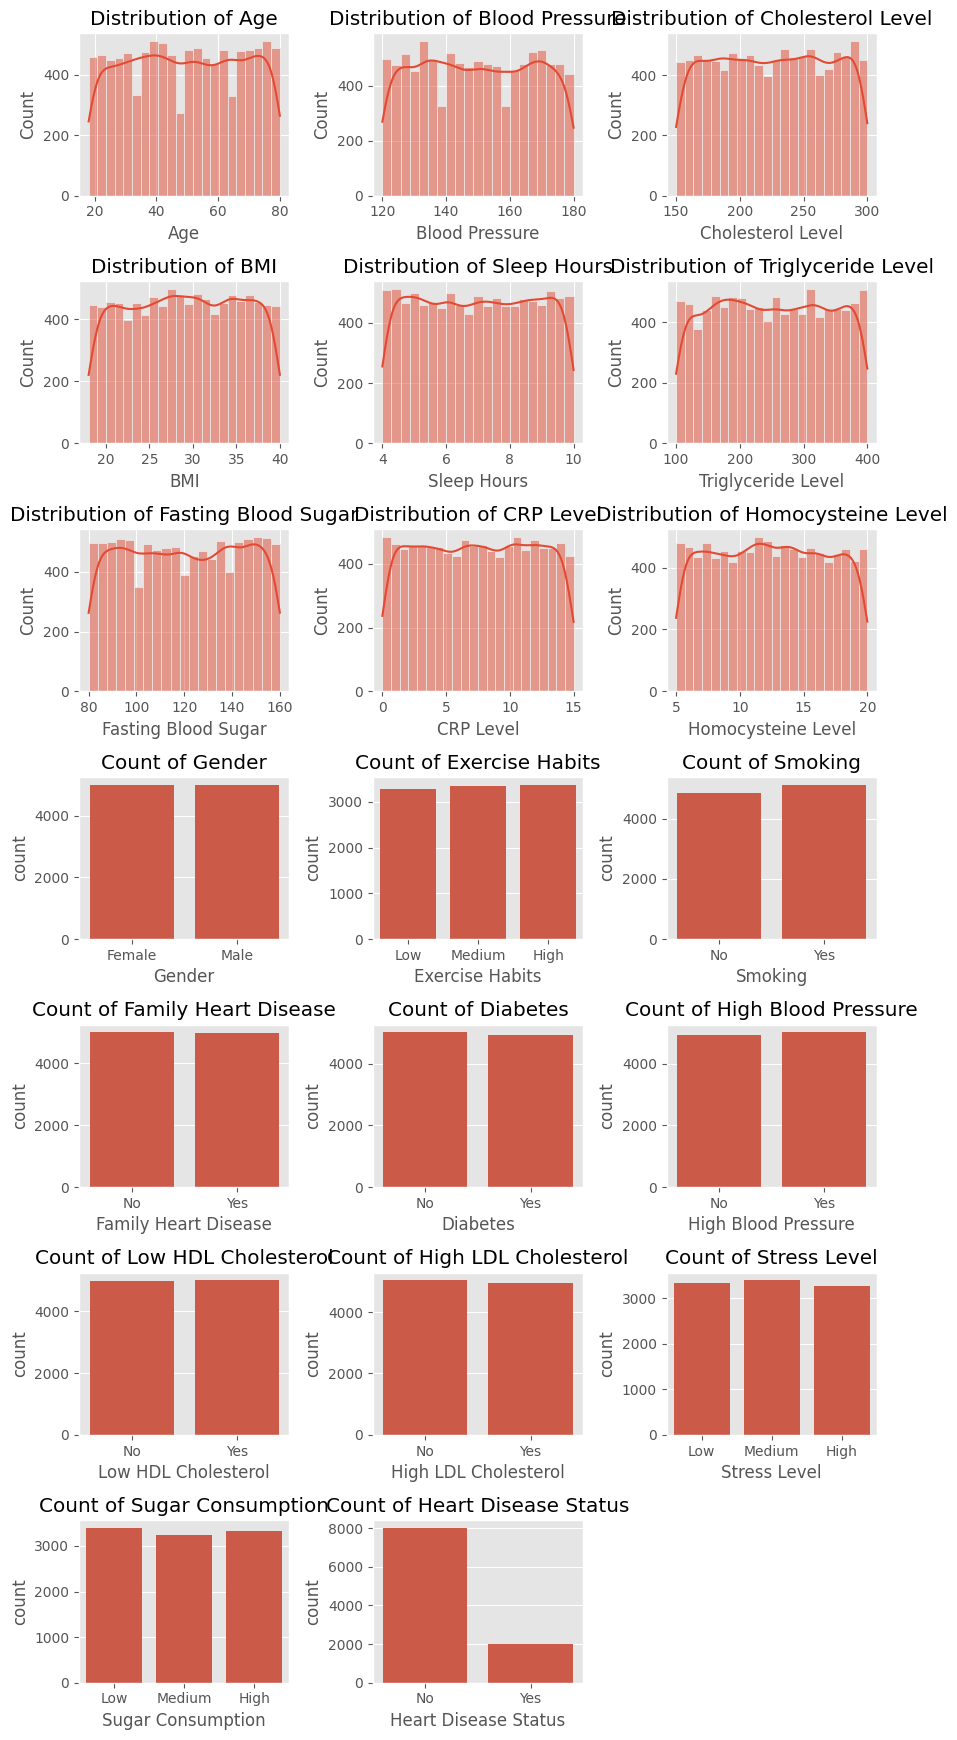

In [131]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Set up grid dimensions
num_numeric = len(numeric_cols)
num_categorical = len(categorical_cols)
total_plots = num_numeric + num_categorical

# Create subplots grid
cols = 3  # Number of columns in the grid
rows = math.ceil(total_plots / cols)  # Calculate rows to fit all plots, round up
fig, axes = plt.subplots(rows, cols, figsize=(9, 2.5 * rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot histograms for numeric columns
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Plot count plots for categorical columns
for j, col in enumerate(categorical_cols, start=len(numeric_cols)):
    sns.countplot(data=df, x=col, ax=axes[j])
    axes[j].set_title(f"Count of {col}")

# Hide unused subplots
for k in range(total_plots, len(axes)):
    axes[k].axis('off')

plt.tight_layout()
plt.show()

In [97]:
# Skewness and Kurtosis
numerical_cols = df.select_dtypes(include=['number'])

skewness = numerical_cols.skew()
print("Skewness:")
print(skewness)

kurtosis = numerical_cols.kurt()
print("\nKurtosis:")
print(kurtosis)

Skewness:
Age                   -0.006657
Blood Pressure         0.013842
Cholesterol Level      -0.00725
BMI                   -0.021368
Sleep Hours            0.000132
Triglyceride Level     0.006216
Fasting Blood Sugar   -0.008885
CRP Level             -0.004074
Homocysteine Level     0.007959
dtype: Float64

Kurtosis:
Age                   -1.198447
Blood Pressure        -1.208449
Cholesterol Level     -1.199729
BMI                   -1.177446
Sleep Hours           -1.219757
Triglyceride Level     -1.19446
Fasting Blood Sugar   -1.226142
CRP Level             -1.204726
Homocysteine Level    -1.176119
dtype: Float64


In [98]:
# Quantiles
numerical_cols.quantile([0.25,0.5,0.75]).T

,0.25,0.50,0.75
Age,34.0,49.0,65.0
Blood Pressure,134.0,150.0,165.0
Cholesterol Level,187.0,226.0,263.0
BMI,23.668887,29.079492,34.509009
Sleep Hours,5.4575,7.0,8.53
Triglyceride Level,176.0,250.0,326.0
Fasting Blood Sugar,99.0,120.0,141.0
CRP Level,3.6818,7.472164,11.244879
Homocysteine Level,8.729771,12.409395,16.130968


In [99]:
# Calculate MAD
for col in numerical_cols:
    mean = np.mean(numerical_cols[col])
    mad = np.mean(np.abs(numerical_cols[col] - mean))
    print(f'{col}: {mad}')

Age: 15.72910848
Blood Pressure: 15.22529916
Cholesterol Level: 37.66887804
BMI: 5.430555357703383
Sleep Hours: 1.5181150946000002
Triglyceride Level: 75.27984400000001
Fasting Blood Sugar: 20.45688526
CRP Level: 3.7519696607301003
Homocysteine Level: 3.72189613832423


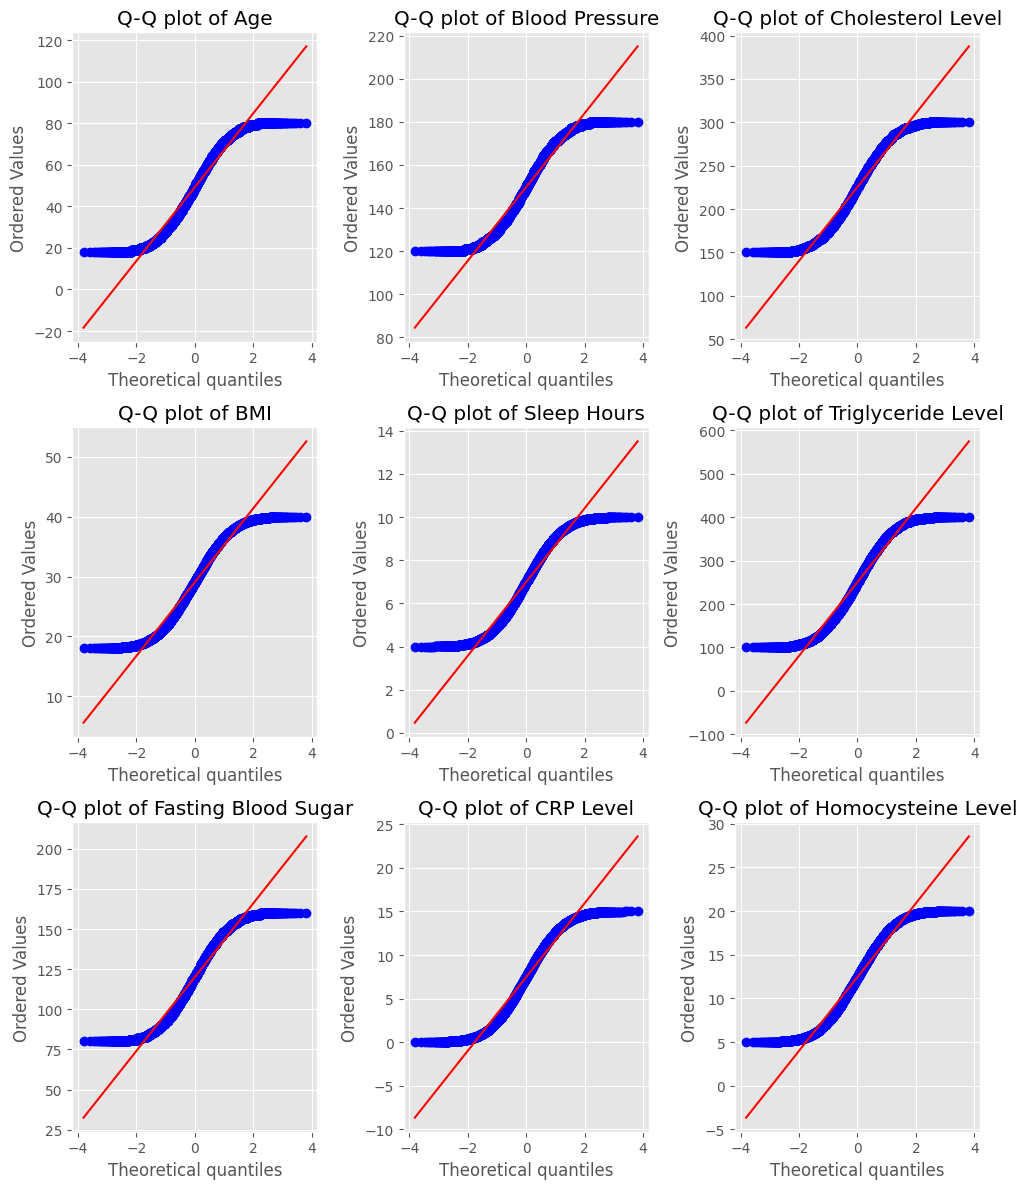

In [100]:
#QQ plots

# Define the number of rows and columns in the subplot grid
n_cols = 3
n_rows = (len(numerical_cols.columns) + n_cols - 1) // n_cols  # This ensures the number of rows is correct

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, n_rows * 4))

# Flatten axes array to easily iterate over
axes = axes.flatten()

# Loop through columns and plot
for i, column in enumerate(numerical_cols.columns):
    probplot(numerical_cols[column], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q plot of {column}')

# Hide any unused axes if the number of columns is odd
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout to avoid overlapping labels
plt.tight_layout()
plt.show()

In [132]:
# Shapiro-Wilk test for normal distriburion
for col in numerical_cols.columns:
    stat, p_value = shapiro(df[col])
    # Check if the data is normal
    if p_value > 0.05:
        print(f'{col} is normally distributed (fail to reject H0).')
    else:
        print(f'{col} is not normally distributed (reject H0).')

Age is not normally distributed (reject H0).
Blood Pressure is not normally distributed (reject H0).
Cholesterol Level is not normally distributed (reject H0).
BMI is not normally distributed (reject H0).
Sleep Hours is not normally distributed (reject H0).
Triglyceride Level is not normally distributed (reject H0).
Fasting Blood Sugar is not normally distributed (reject H0).
CRP Level is not normally distributed (reject H0).
Homocysteine Level is not normally distributed (reject H0).


<function matplotlib.pyplot.show(close=None, block=None)>

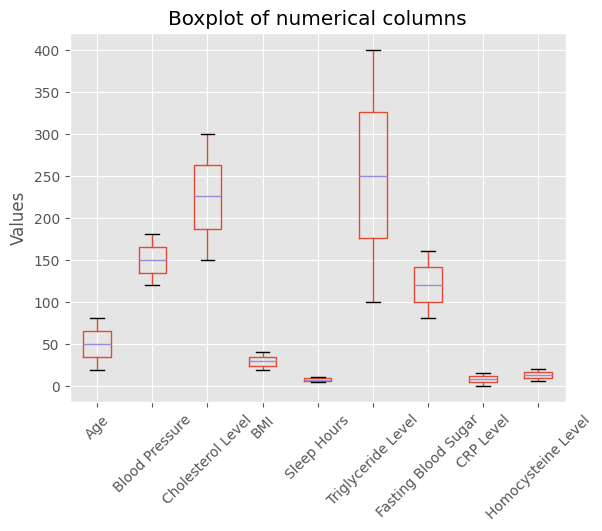

In [102]:
#Identify outliers
numerical_cols.boxplot()
plt.title('Boxplot of numerical columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show

In [103]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1  
    
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR  
    
   
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f'{col} column: {len(outliers)} outliers')

Age column: 0 outliers
Blood Pressure column: 0 outliers
Cholesterol Level column: 0 outliers
BMI column: 0 outliers
Sleep Hours column: 0 outliers
Triglyceride Level column: 0 outliers
Fasting Blood Sugar column: 0 outliers
CRP Level column: 0 outliers
Homocysteine Level column: 0 outliers


In [104]:
# Distribution of Heart Disease Status by Age
import plotly.express as px

age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)


fig10 = px.violin(df, 
                  x='Age Group', 
                  y='Heart Disease Status', 
                  title='Heart Disease Status by Age Group', 
                  labels={'Age Group': 'Age Group', 'Heart Disease Statusl': 'Heart Disease Status'},
                  color='Age Group',
                  box=True, 
                  
                  color_discrete_sequence=px.colors.qualitative.Pastel)
fig10.show(renderer='iframe')

In [136]:
# Distribution of Heart Disease Status by Blood Pressure

blood_pressure_bins = [120, 129, 130, 140, 180]
blood_pressure_labels = ['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2']
df['Blood Pressure Group'] = pd.cut(df['Blood Pressure'], bins=blood_pressure_bins, labels=blood_pressure_labels, right=False)


fig10 = px.violin(df, 
                  x='Blood Pressure', 
                  y='Heart Disease Status', 
                  title='Heart Disease Status by Blood Pressure', 
                  labels={'Blood Pressure Group': 'Blood Pressure Group', 'Heart Disease Statusl': 'Heart Disease Status'},
                  color='Blood Pressure Group',
                  box=True, 
                  color_discrete_sequence=px.colors.qualitative.Pastel)
fig10.show(renderer='iframe')

In [138]:
# Distribution of Heart Disease Status by CRP Level (inflammation marker)

crp_bins = [0, 3, 10, 100, 150]
crp_labels = ['Normal', 'Low-grade Inflammation', 'Moderate Inflammation', 'High Inflammation']
df['CRP Group'] = pd.cut(df['CRP Level'], bins=crp_bins, labels=crp_labels, right=False)


fig10 = px.violin(df, 
                  x='CRP Level', 
                  y='Heart Disease Status', 
                  title='Heart Disease Status by CRP Levels', 
                  labels={'CRP Group': 'CRP Group', 'Heart Disease Statusl': 'Heart Disease Status'},
                  color='CRP Group',
                  box=True, 
                  color_discrete_sequence=px.colors.qualitative.Pastel)
fig10.show(renderer='iframe')

In [140]:
# Distribution of Heart Disease Status by Sleep hours

sleep_bins = [0, 6, 10, 24]
sleep_labels = ['Less', 'Recommended', 'More']
df['Sleep Hours Group'] = pd.cut(df['Sleep Hours'], bins=sleep_bins, labels=sleep_labels, right=False)


fig10 = px.violin(df, 
                  x='Sleep Hours', 
                  y='Heart Disease Status', 
                  title='Heart Disease Status by Sleep Hours', 
                  labels={'Sleep Hours Group': 'Sleep Hours Group', 'Heart Disease Statusl': 'Heart Disease Status'},
                  color='Sleep Hours Group',
                  box=True, 
                  color_discrete_sequence=px.colors.qualitative.Pastel)
fig10.show(renderer='iframe')

# Correlations

<Axes: >

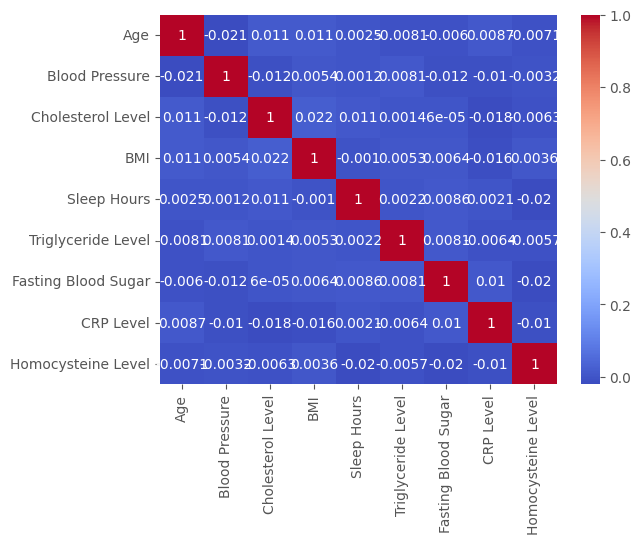

In [105]:
#Correlation of the numeric columns (Pearson's)
numerical_cols.corr()
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')

<Axes: >

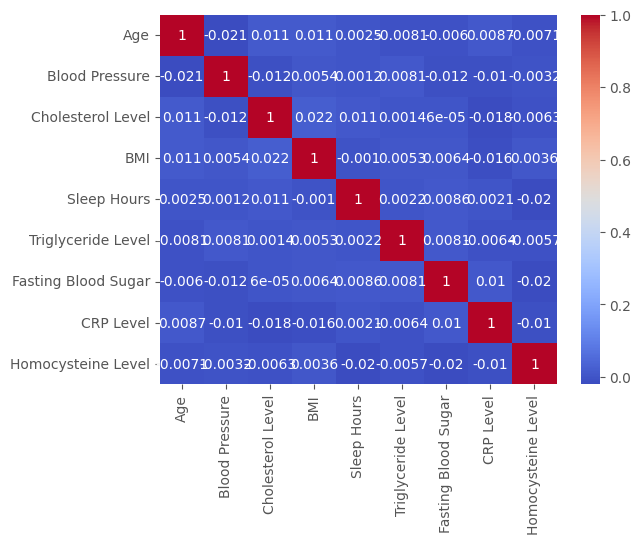

In [106]:
#Correlation of the numeric columns (Spearman)
numerical_cols.corr(method='spearman')
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')

<Axes: >

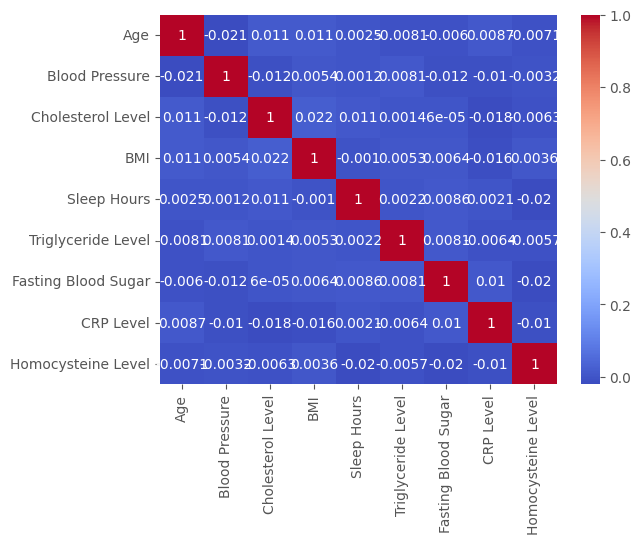

In [107]:
#Correlation of the numeric columns (Kendall Tau)
numerical_cols.corr(method='kendall')
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')

In [61]:
categoric_cols = df.select_dtypes(include=['object', 'category'])
print(categoric_cols.columns)

Index(['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease',
       'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol',
       'High LDL Cholesterol', 'Stress Level', 'Sugar Consumption',
       'Heart Disease Status'],
      dtype='object')


Gender,Female,Male
Heart Disease Status,,
No,3948,4034
Yes,1030,969


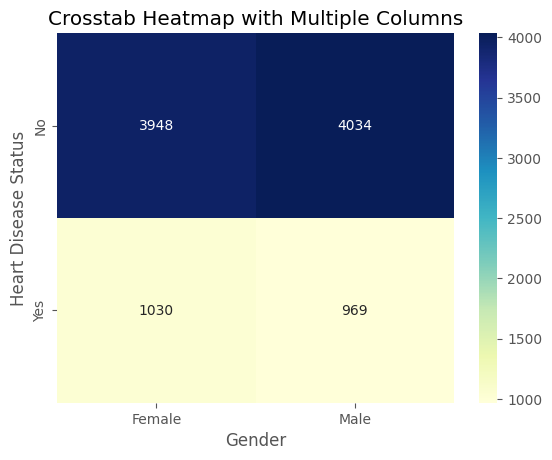

In [73]:
# Crosstab analysis
crosstab = pd.crosstab(index=df['Heart Disease Status'], columns=df['Gender'])
display(crosstab)

sns.heatmap(crosstab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Crosstab Heatmap Heart Disease Status by Gender")
plt.show()

In [113]:
def create_crosstab_with_percentages(data, column1, column2):
    """
    Create a formatted crosstab showing both crosstab counts and percentages for given columns.

    Parameters:
    - data: pandas DataFrame containing the data.
    - column1, column2: str, the column names for which to generate the crosstab.
    
    Returns:
    - pd.DataFrame: Formatted crosstab with counts and percentages.
    """
    # Calculate counts
    crosstab = pd.crosstab(data[column1], data[column2])  # Use variable names, not strings
    
    # Calculate percentages
    percentages = (pd.crosstab(data[column1], data[column2], normalize="index") * 100).round(1)
    
    # Format the crosstab with counts and percentages
    formatted_crosstab = crosstab.astype(str) + " (" + percentages.astype(str) + "%)"
    return formatted_crosstab

In [114]:
create_crosstab_with_percentages(df, 'Gender', 'Heart Disease Status')

Heart Disease Status,No,Yes
Gender,,
Female,3948 (79.3%),1030 (20.7%)
Male,4052 (80.7%),970 (19.3%)


In [116]:
create_crosstab_with_percentages(df, 'High Blood Pressure', 'Heart Disease Status')

Heart Disease Status,No,Yes
High Blood Pressure,,
No,3966 (80.1%),986 (19.9%)
Yes,4034 (79.9%),1014 (20.1%)


In [117]:
create_crosstab_with_percentages(df, 'Stress Level', 'Heart Disease Status')

Heart Disease Status,No,Yes
Stress Level,,
High,2622 (80.2%),649 (19.8%)
Low,2698 (81.3%),622 (18.7%)
Medium,2680 (78.6%),729 (21.4%)


In [112]:
# Chi2 correlation for categorical data
columns = categoric_cols.columns
results = []
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        contingency_table = pd.crosstab(categoric_cols[col1], categoric_cols[col2])
        chi2, p, dof, _ = chi2_contingency(contingency_table)
        results.append({
            'Variable 1': col1,
            'Variable 2': col2,
            'Chi2': chi2,
            'P-Value': p,
            'Degrees of Freedom': dof
        })

# Convert results to a DataFrame for display
results_df = pd.DataFrame(results)

# Display results
display(results_df)

,Variable 1,Variable 2,Chi2,P-Value,Degrees of Freedom
0,Gender,Exercise Habits,1.458484,0.482274,2
1,Gender,Smoking,1.062526,0.302640,1
2,Gender,Family Heart Disease,0.006329,0.936589,1
3,Gender,Diabetes,0.242517,0.622394,1
4,Gender,High Blood Pressure,1.936011,0.164102,1
5,Gender,Low HDL Cholesterol,0.337222,0.561437,1
6,Gender,High LDL Cholesterol,1.145709,0.284449,1
7,Gender,Stress Level,2.701734,0.259016,2
8,Gender,Sugar Consumption,0.946101,0.623099,2
9,Gender,Heart Disease Status,2.643460,0.103977,1


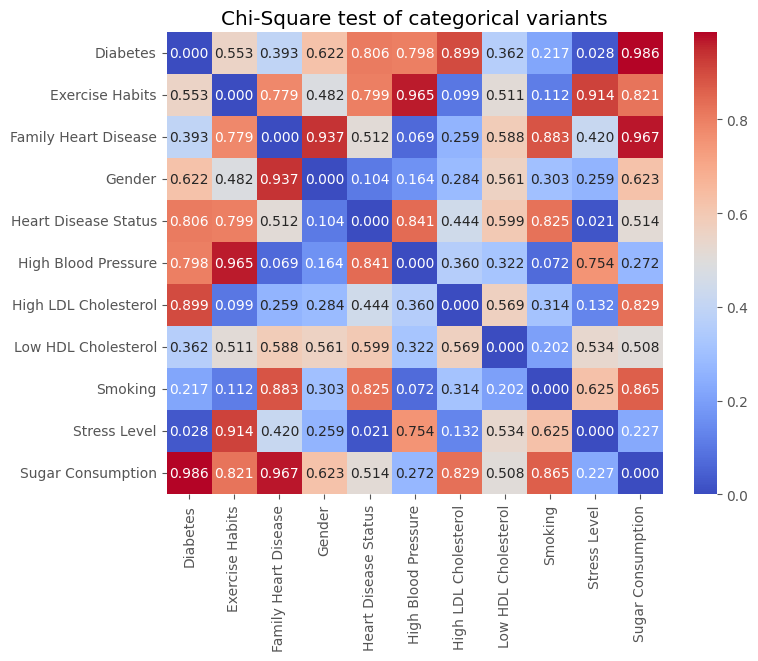

In [148]:
#Heat map of Chi2 P-Value
# Get unique variables
variables = sorted(set(results_df['Variable 1']).union(results_df['Variable 2']))

# Create a matrix for the P-Values
p_val_matrix = pd.DataFrame(np.nan, index=variables, columns=variables)
# Populate the P-Value matrix
for _, row in results_df.iterrows():
    p_val_matrix.loc[row['Variable 1'], row['Variable 2']] = row['P-Value']
    p_val_matrix.loc[row['Variable 2'], row['Variable 1']] = row['P-Value']

# Fill diagonal with 0 (self-correlation)
np.fill_diagonal(p_val_matrix.values, 0)


plt.figure(figsize=(8,6))
sns.heatmap(p_val_matrix, annot=True, cmap='coolwarm', fmt=".3f", cbar=True)
plt.title("Chi-Square test of categorical variants")
plt.show()
#Note that the correlated variables are in BLUE!

In [142]:
# Kruskal-Wallis H Test
import scipy.stats as stats

# Define the continuous variables
continuous_vars = ['Age', 'Blood Pressure', 'Cholesterol Level', 'Sleep Hours', 
                   'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']

# Perform Kruskal-Wallis test for each variable based on Heart Disease Status
results = {}

for var in continuous_vars:
    group_0 = df[df['Heart Disease Status'] == 0][var]  # Group where Heart Disease Status = 0 (No)
    group_1 = df[df['Heart Disease Status'] == 1][var]  # Group where Heart Disease Status = 1 (Yes)
    
    # Kruskal-Wallis test
    stat, p_value = stats.kruskal(group_0.dropna(), group_1.dropna())  # drop NaN values for testing
    results[var] = {'Statistic': stat, 'P-Value': p_value}

# Display results
for var, result in results.items():
    print(f"\nKruskal-Wallis Test for {var}:")
    print(f"Statistic: {result['Statistic']:.3f}, P-Value: {result['P-Value']:.3f}")
    
    # Interpret the result
    if result['P-Value'] < 0.05:
        print("Conclusion: There is a significant difference between the heart disease groups.")
    else:
        print("Conclusion: There is no significant difference between the heart disease groups.")


Kruskal-Wallis Test for Age:
Statistic: nan, P-Value: nan
Conclusion: There is no significant difference between the heart disease groups.

Kruskal-Wallis Test for Blood Pressure:
Statistic: nan, P-Value: nan
Conclusion: There is no significant difference between the heart disease groups.

Kruskal-Wallis Test for Cholesterol Level:
Statistic: nan, P-Value: nan
Conclusion: There is no significant difference between the heart disease groups.

Kruskal-Wallis Test for Sleep Hours:
Statistic: nan, P-Value: nan
Conclusion: There is no significant difference between the heart disease groups.

Kruskal-Wallis Test for Triglyceride Level:
Statistic: nan, P-Value: nan
Conclusion: There is no significant difference between the heart disease groups.

Kruskal-Wallis Test for Fasting Blood Sugar:
Statistic: nan, P-Value: nan
Conclusion: There is no significant difference between the heart disease groups.

Kruskal-Wallis Test for CRP Level:
Statistic: nan, P-Value: nan
Conclusion: There is no signifi

## Aggregation of data by Gender

In [48]:
gender_counts = df['Gender'].value_counts()
gender_distribution = df['Gender'].value_counts(normalize=True) * 100

print("Gender Counts:\n", gender_counts)
print("\nGender Distribution (%):\n", gender_distribution)

Gender Counts:
 Gender
Male      5003
Female    4978
Name: count, dtype: int64

Gender Distribution (%):
 Gender
Male      50.125238
Female    49.874762
Name: proportion, dtype: float64


In [52]:
display(df.groupby('Gender').describe())

C:\Users\karen\AppData\Local\Temp\ipykernel_52256\1583841314.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  display(df.groupby('Gender').describe())


Age                                                      \
         count       mean        std   min   25%   50%   75%   max   
Gender                                                               
Female  4964.0  49.454069   18.25365  18.0  34.0  50.0  65.0  80.0   
Male    4988.0  49.183641  18.128542  18.0  34.0  49.0  65.0  80.0   

       Blood Pressure                                                     \
                count        mean        std    min    25%    50%    75%   
Gender                                                                     
Female         4965.0    149.8143  17.509838  120.0  134.0  150.0  165.0   
Male           4997.0  149.721833  17.647612  120.0  134.0  149.0  166.0   

              Cholesterol Level                                              \
          max             count        mean        std    min    25%    50%   
Gender                                                                        
Female  180.0            4964.0  225.977236  43.411842  150.0  188.0  227.0   
Male    180.0            4987.0  224.862843  43.733752  150.0  187.0  225.0   

                         BMI                                             \
          75%    max   count       mean       std        min        25%   
Gender                                                                    
Female  263.0  300.0  4968.0  29.178601  6.265919  18.007058   23.83585   
Male    262.0  300.0  4991.0  28.973132  6.341521  18.002837  23.494857   

                                        Sleep Hours                           \
              50%        75%        max       count      mean       std  min   
Gender                                                                         
Female  29.129655   34.56199  39.989493      4969.0  6.989521  1.764215  4.0   
Male    29.034487  34.460713  39.996954      4987.0  6.991678  1.742428  4.0   

                              Triglyceride Level                         \
        25%   50%   75%   max              count        mean        std   
Gender                                                                    
Female  5.4  6.99  8.55  10.0             4965.0  249.356093  87.797433   
Male    5.5  7.01  8.52  10.0             4990.0  252.063527    86.3047   

                                          Fasting Blood Sugar              \
          min    25%    50%    75%    max               count        mean   
Gender                                                                      
Female  100.0  174.0  246.0  327.0  400.0              4970.0  120.177062   
Male    100.0  178.0  254.0  324.0  400.0              4989.0  120.103628   

                                                   CRP Level            \
              std   min   25%    50%    75%    max     count      mean   
Gender                                                                   
Female  23.617807  80.0  99.0  120.0  141.0  160.0    4964.0  7.538055   
Male    23.561312  80.0  99.0  119.0  141.0  160.0    4991.0  7.404443   

                                                                      \
             std       min       25%       50%        75%        max   
Gender                                                                 
Female  4.356674  0.003647  3.681368  7.554602  11.379633  14.997087   
Male    4.324792  0.008811  3.667909  7.393837  11.130555  14.989596   

       Homocysteine Level                                                      \
                    count       mean       std       min       25%        50%   
Gender                                                                          
Female             4969.0  12.430081  4.390974  5.001209  8.601809  12.322477   
Male               4992.0  12.489153  4.255135  5.000236  8.875705  12.481742   

                              
              75%        max  
Gender                        
Female  16.223348  19.999037  
Male    16.058043  19.998759

In [63]:
for col in categoric_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts(normalize=True) * 100}\n")

Value counts for Gender:
Gender
Male      50.125238
Female    49.874762
Name: proportion, dtype: float64

Value counts for Exercise Habits:
Exercise Habits
High      33.804511
Medium    33.403509
Low       32.791980
Name: proportion, dtype: float64

Value counts for Smoking:
Smoking
Yes    51.358396
No     48.641604
Name: proportion, dtype: float64

Value counts for Family Heart Disease:
Family Heart Disease
No     50.145305
Yes    49.854695
Name: proportion, dtype: float64

Value counts for Diabetes:
Diabetes
No     50.330993
Yes    49.669007
Name: proportion, dtype: float64

Value counts for High Blood Pressure:
High Blood Pressure
Yes    50.350912
No     49.649088
Name: proportion, dtype: float64

Value counts for Low HDL Cholesterol:
Low HDL Cholesterol
Yes    50.125313
No     49.874687
Name: proportion, dtype: float64

Value counts for High LDL Cholesterol:
High LDL Cholesterol
No     50.491277
Yes    49.508723
Name: proportion, dtype: float64

Value counts for Stress Level:
Stres

In [65]:
for col in categorical_cols:
    print(f"\nCrosstab of {col} by Gender:")
    print(pd.crosstab(df['Gender'], df[col], normalize='index') * 100)


Crosstab of Gender by Gender:
Gender  Female   Male
Gender               
Female   100.0    0.0
Male       0.0  100.0

Crosstab of Exercise Habits by Gender:
Exercise Habits       High        Low     Medium
Gender                                          
Female           34.279388  32.850242  32.870370
Male             33.360064  32.718524  33.921411

Crosstab of Smoking by Gender:
Smoking         No        Yes
Gender                       
Female   48.116059  51.883941
Male     49.168836  50.831164

Crosstab of Family Heart Disease by Gender:
Family Heart Disease         No        Yes
Gender                                    
Female                50.100604  49.899396
Male                  50.200401  49.799599

Crosstab of Diabetes by Gender:
Diabetes         No        Yes
Gender                        
Female    50.583971  49.416029
Male      50.070211  49.929789

Crosstab of High Blood Pressure by Gender:
High Blood Pressure         No        Yes
Gender                           

## Aggregation of data by Heart Disease Status

In [66]:
for col in categorical_cols:
    print(f"\nCrosstab of {col} with Heart Disease Status:")
    print(pd.crosstab(df[col], df['Heart Disease Status'], normalize='index') * 100)


Crosstab of Gender with Heart Disease Status:
Heart Disease Status         No        Yes
Gender                                    
Female                79.308959  20.691041
Male                  80.631621  19.368379

Crosstab of Exercise Habits with Heart Disease Status:
Heart Disease Status         No        Yes
Exercise Habits                           
High                  79.982206  20.017794
Low                   80.281260  19.718740
Medium                79.621849  20.378151

Crosstab of Smoking with Heart Disease Status:
Heart Disease Status         No        Yes
Smoking                                   
No                    80.111294  19.888706
Yes                   79.914113  20.085887

Crosstab of Family Heart Disease with Heart Disease Status:
Heart Disease Status         No        Yes
Family Heart Disease                      
No                    79.756195  20.243805
Yes                   80.301508  19.698492

Crosstab of Diabetes with Heart Disease Status:
Heart Di

# Data analysis summary and conclusions
The data is composed of 21 columns with various health indicators and risk factors related to heart disease from kaggle.
The data had missing values in 20/21 columns. The columns of 'Alcohol Consumption' had 1.69% of the values missing, therefore I decided to delete this column. In the numerical columns the values were replaced with the mean value and in the categorical columns the values were replaced with the mode (most abundant value).
None of the numerical columns have a normal distribution, therefore non-parametrical tests should be performed.
No outliers were found.
The only variables that are correlated are: 'Diabetes' with 'Stress Level' and 'Stress Level' with 'Heart Disease Status'.